In [114]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [115]:
# Dataframe from CSV
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [116]:
df.head ()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [117]:
# Numbers of rows and columns
df.shape

(9134, 24)

In [118]:
# Rename columns
df = df.rename(columns=lambda x: x.upper().replace(' ', '_'))

In [119]:
df.columns

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

# EDA

In [120]:
df_cat = df.select_dtypes (include = object)

In [121]:
df_cat.drop(['CUSTOMER', 'EFFECTIVE_TO_DATE'], axis=1, inplace = True)

### State

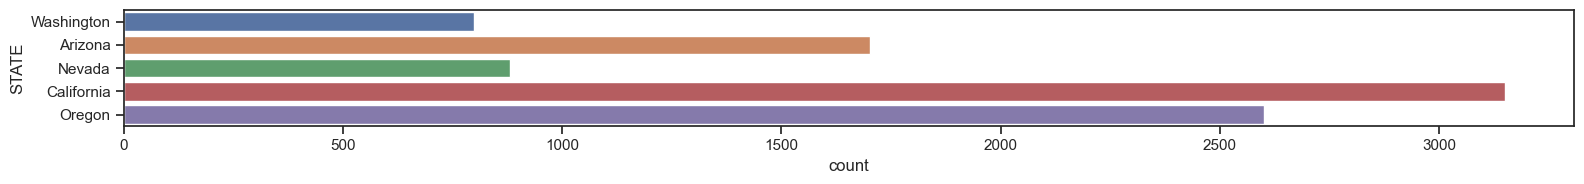

Value counts
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64
_____________________
Data Distribution


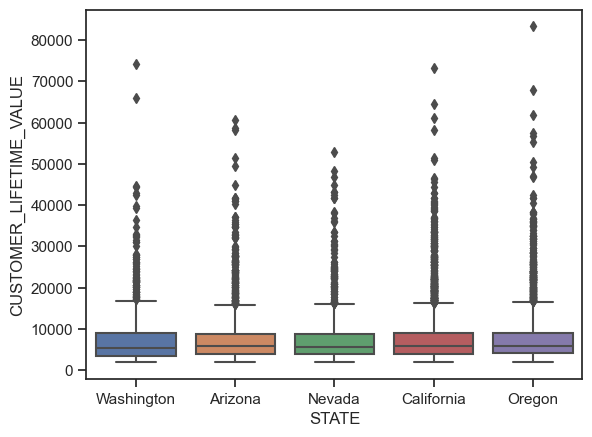

In [122]:
sns.set(style="ticks")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(16, 2))

# Creación de gráfico
sns.countplot(data=df_cat, y=df_cat['STATE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()
print ('Value counts')
print (df_cat['STATE'].value_counts())
print ('_____________________')

# Visually analyzing categorical data with Target variable
print ('Data Distribution')
sns.boxplot(x="STATE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### RESPONSE

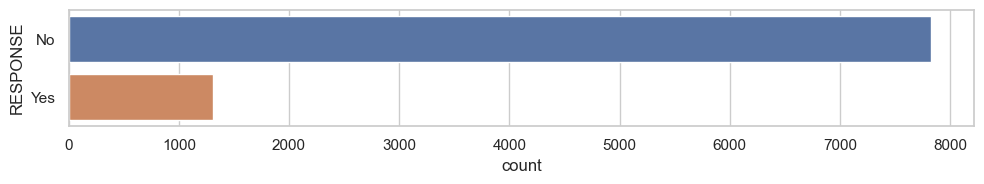

No     7826
Yes    1308
Name: RESPONSE, dtype: int64
Data Distribution


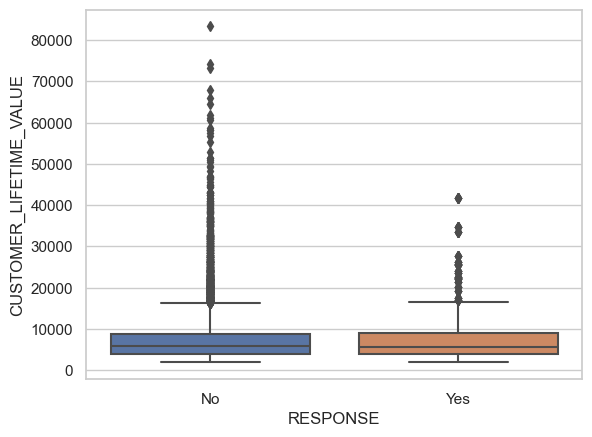

In [123]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 2))

sns.countplot(data=df_cat, y=df_cat['RESPONSE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['RESPONSE'].value_counts())

# Visually analyzing categorical data with Target variable
print ('Data Distribution')
sns.boxplot(x="RESPONSE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### COVERAGE

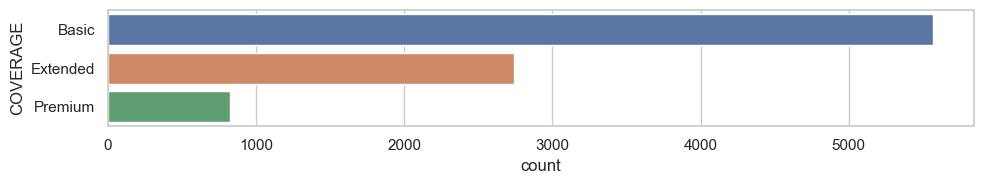

Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64
Data Distribution


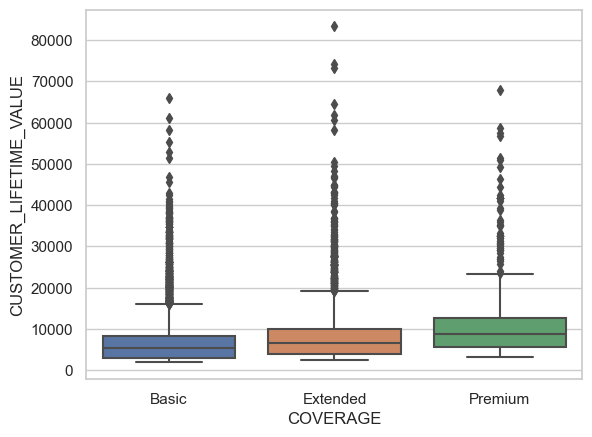

In [124]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 2))

sns.countplot(data=df_cat, y=df_cat['COVERAGE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['COVERAGE'].value_counts())

print ('Data Distribution')
sns.boxplot(x="COVERAGE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### EDUCATION

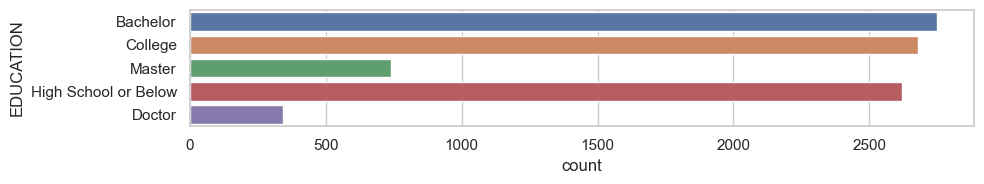

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64
Data Distribution


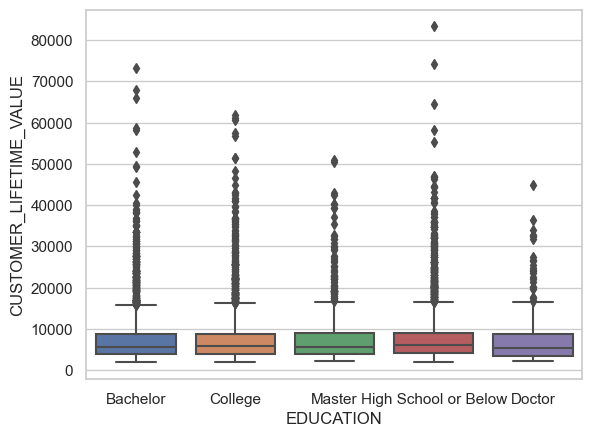

In [125]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 2))

sns.countplot(data=df_cat, y=df_cat['EDUCATION'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['EDUCATION'].value_counts())

print ('Data Distribution')
sns.boxplot(x="EDUCATION", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### EMPLOYMENT STATUS

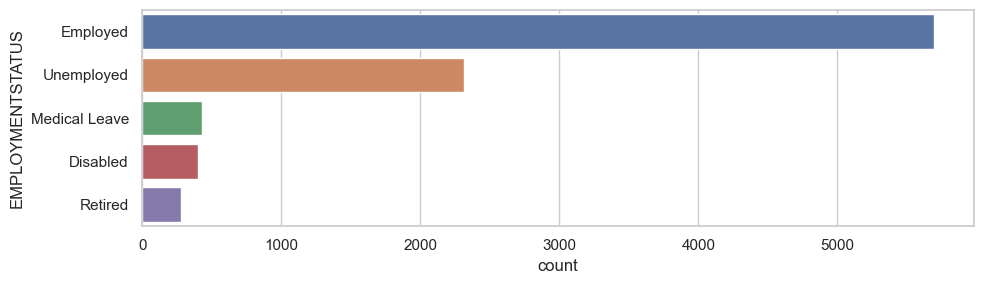

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EMPLOYMENTSTATUS, dtype: int64
Data Distribution


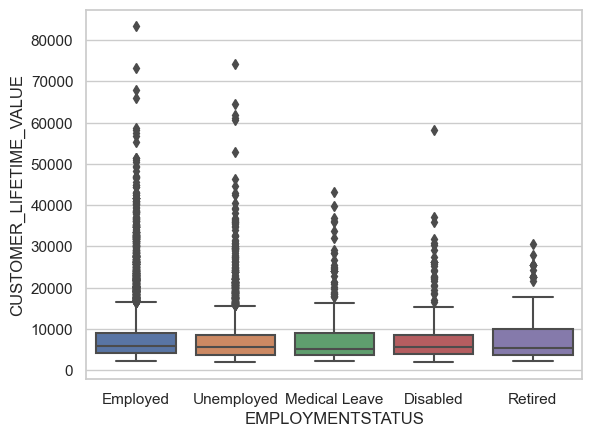

In [126]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 3))

sns.countplot(data=df_cat, y=df_cat['EMPLOYMENTSTATUS'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['EMPLOYMENTSTATUS'].value_counts())

print ('Data Distribution')
sns.boxplot(x="EMPLOYMENTSTATUS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

In [127]:
def clean_employmentstatus_col(x):
    if x in ['Medical Leave','Disabled','Retired']:
        return 'Other'
    else:
        return x

In [128]:
df['EMPLOYMENTSTATUS'] = list(map(clean_employmentstatus_col, df['EMPLOYMENTSTATUS']))

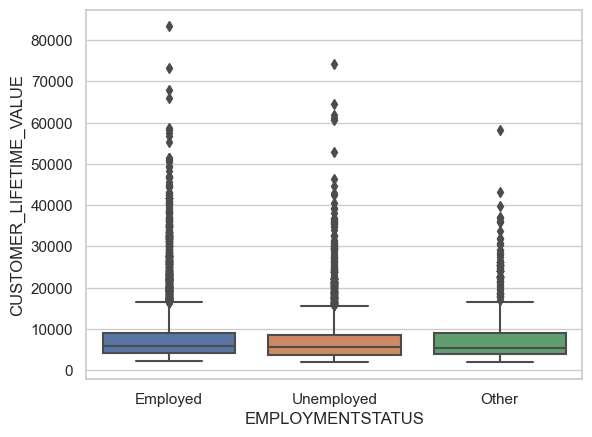

In [129]:
sns.boxplot(x="EMPLOYMENTSTATUS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### Gender

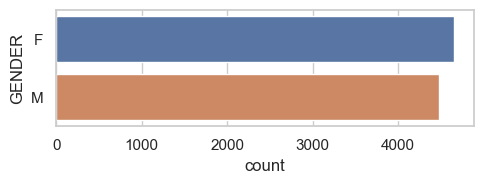

F    4658
M    4476
Name: GENDER, dtype: int64
Data Distribution


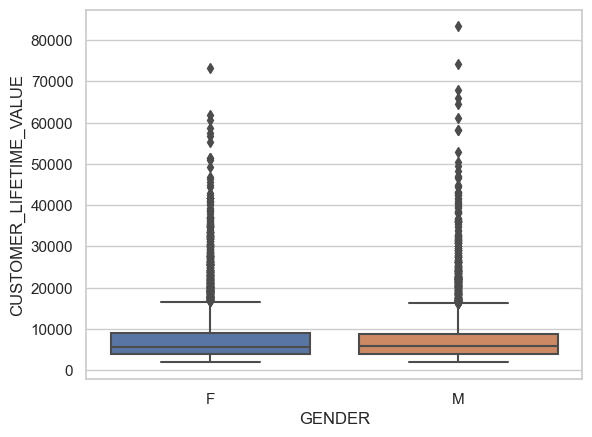

In [130]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(5, 2))

sns.countplot(data=df_cat, y=df_cat['GENDER'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['GENDER'].value_counts())

print ('Data Distribution')
sns.boxplot(x="GENDER", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

LOCATION_CODE

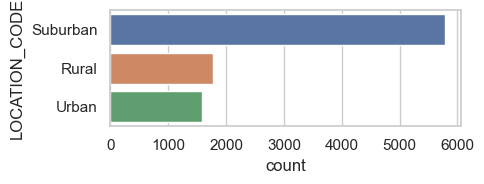

Suburban    5779
Rural       1773
Urban       1582
Name: LOCATION_CODE, dtype: int64
Data Distribution


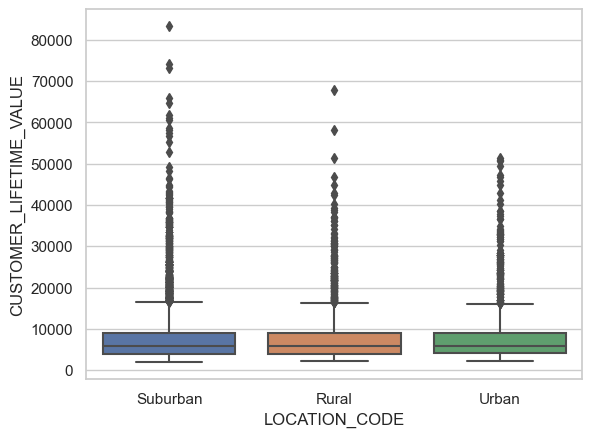

In [131]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(5, 2))

sns.countplot(data=df_cat, y=df_cat['LOCATION_CODE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['LOCATION_CODE'].value_counts())

print ('Data Distribution')
sns.boxplot(x="LOCATION_CODE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### MARITAL_STATUS

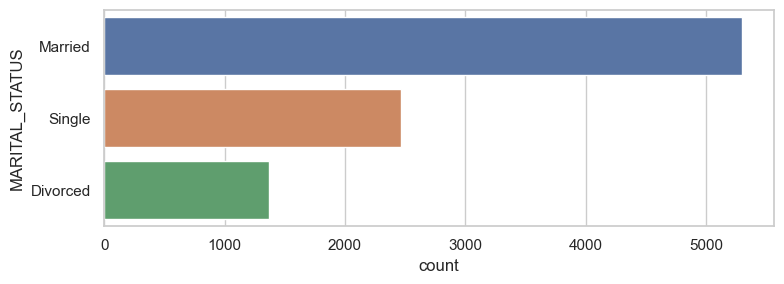

Married     5298
Single      2467
Divorced    1369
Name: MARITAL_STATUS, dtype: int64
Data Distribution


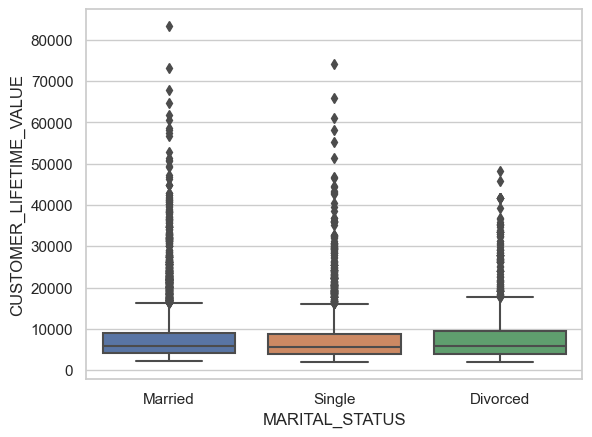

In [132]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['MARITAL_STATUS'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['MARITAL_STATUS'].value_counts())

print ('Data Distribution')
sns.boxplot(x="MARITAL_STATUS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### POLICY_TYPE

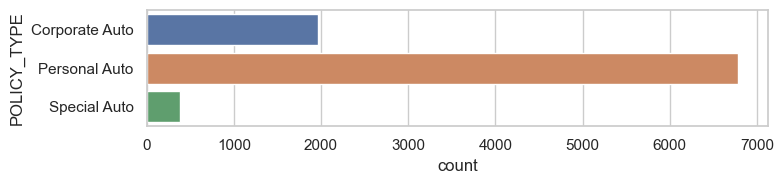

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: POLICY_TYPE, dtype: int64
Data Distribution


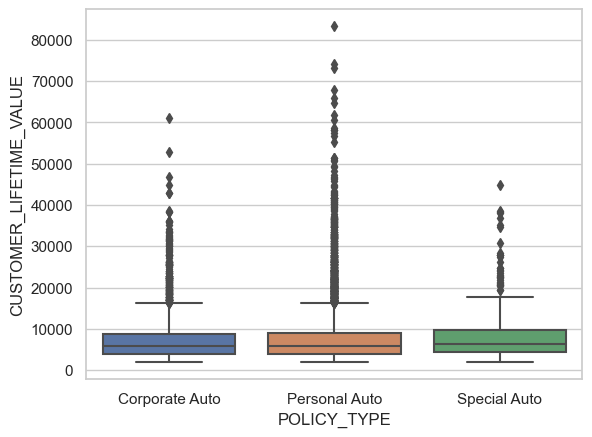

In [133]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 2))

sns.countplot(data=df_cat, y=df_cat['POLICY_TYPE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['POLICY_TYPE'].value_counts())

print ('Data Distribution')
sns.boxplot(x="POLICY_TYPE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### POLICY

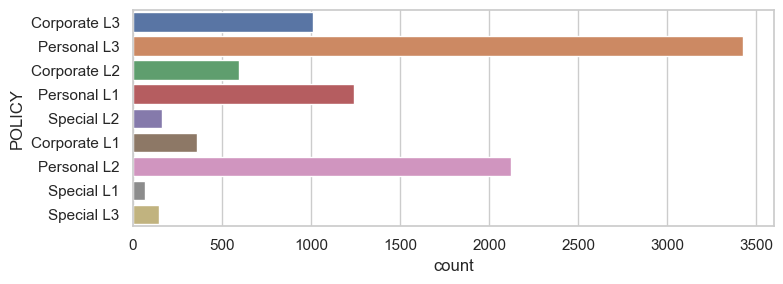

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: POLICY, dtype: int64
Data Distribution


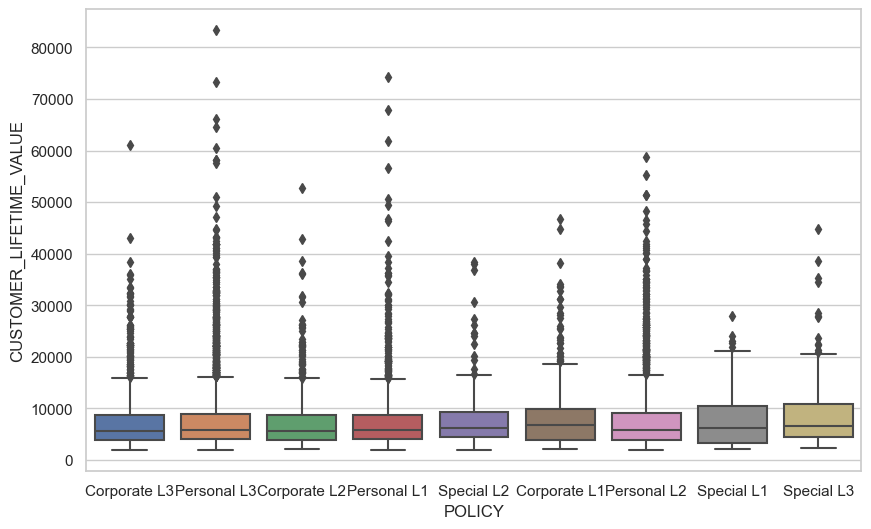

In [134]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['POLICY'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['POLICY'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(10, 6))
sns.boxplot(x="POLICY", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### RENEW_OFFER_TYPE

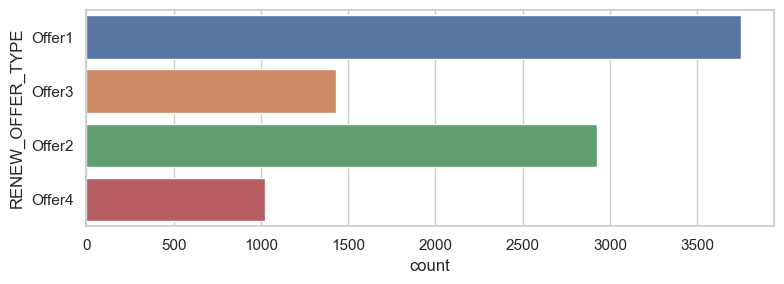

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: RENEW_OFFER_TYPE, dtype: int64
Data Distribution


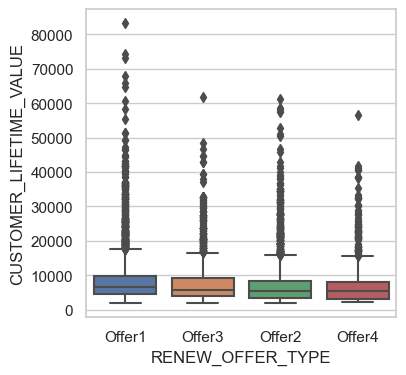

In [135]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['RENEW_OFFER_TYPE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['RENEW_OFFER_TYPE'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(4, 4))
sns.boxplot(x="RENEW_OFFER_TYPE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### SALES_CHANNEL

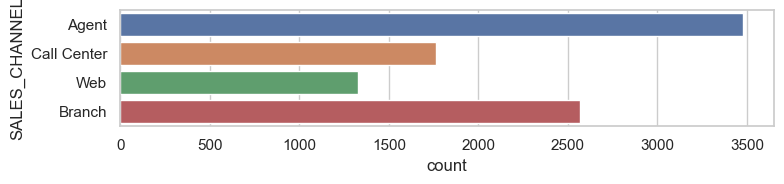

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: SALES_CHANNEL, dtype: int64
Data Distribution


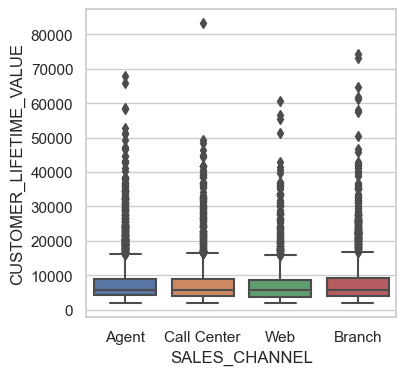

In [136]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 2))

sns.countplot(data=df_cat, y=df_cat['SALES_CHANNEL'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['SALES_CHANNEL'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(4, 4))
sns.boxplot(x="SALES_CHANNEL", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### VEHICLE_CLASS

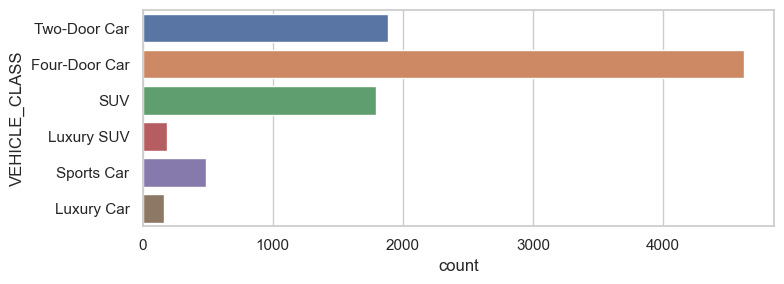

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: VEHICLE_CLASS, dtype: int64
Data Distribution


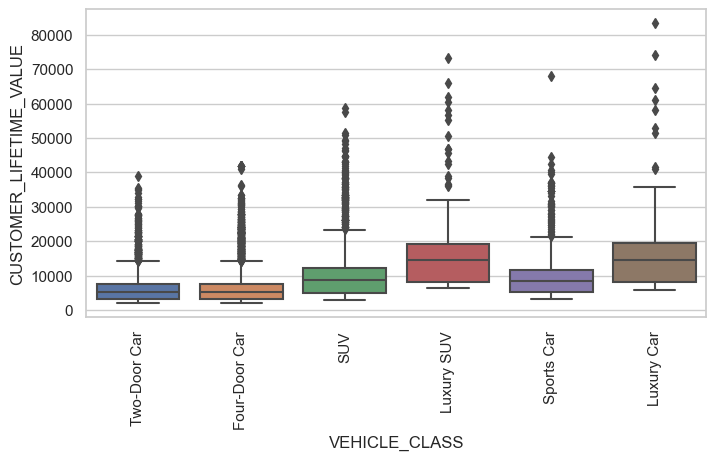

In [137]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['VEHICLE_CLASS'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['VEHICLE_CLASS'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(8, 4))
sns.boxplot(x="VEHICLE_CLASS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.xticks(rotation=90)
plt.show()

In [138]:
def clean_vehicle_class_col(x):
    if x in ['Sports Car','Luxury SUV','Luxury Car']:
        return 'Other'
    else:
        return x

In [139]:
df['VEHICLE_CLASS'] = list(map(clean_vehicle_class_col, df['VEHICLE_CLASS']))

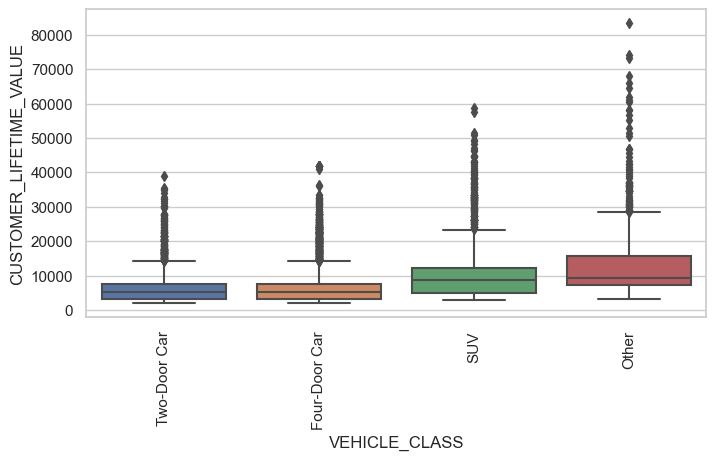

In [140]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="VEHICLE_CLASS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.xticks(rotation=90)
plt.show()

### VEHICLE_SIZE

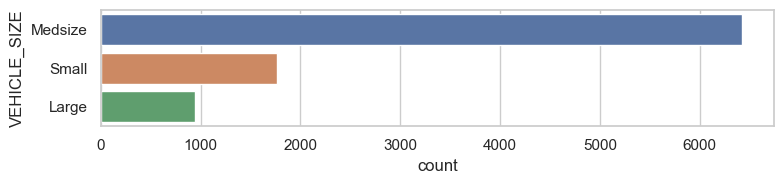

Medsize    6424
Small      1764
Large       946
Name: VEHICLE_SIZE, dtype: int64


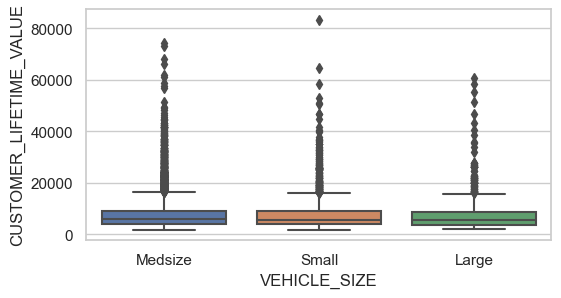

In [141]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 2))

sns.countplot(data=df_cat, y=df_cat['VEHICLE_SIZE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['VEHICLE_SIZE'].value_counts())

plt.figure(figsize=(6, 3))
sns.boxplot(x="VEHICLE_SIZE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### Week 10
# Lab | Feature extraction

1. Open the categoricals variable we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

2: All categorical variables contain a significatn portion of outliers.

In [142]:
df_cat.head (10)

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [143]:
print (df_cat['POLICY_TYPE'].value_counts())

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: POLICY_TYPE, dtype: int64


In [144]:
print (df_cat['POLICY'].value_counts())

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: POLICY, dtype: int64


The column "POLICY_TYPE" is the result of summing the subgroups of policy types. We could delete the column Policy type because has less information than policy column.

In [145]:
'EFFECTIVE_TO_DATE'

'EFFECTIVE_TO_DATE'

In [146]:
# Convertir la columna 'EFFECTIVE_TO_DATE' a datetime si no lo es ya
df['EFFECTIVE_TO_DATE'] = pd.to_datetime(df['EFFECTIVE_TO_DATE'], format='%m%d%Y', errors='ignore')

# Cambiar el formato de la columna 'EFFECTIVE_TO_DATE' para que los días aparezcan con dos dígitos
# df['EFFECTIVE_TO_DATE'] = df['EFFECTIVE_TO_DATE'].dt.strftime('%d/%m/%Y')

In [147]:
df['EFFECTIVE_TO_DATE'].min ()

'1/1/11'

In [148]:
df['EFFECTIVE_TO_DATE'].max ()

'2/9/11'

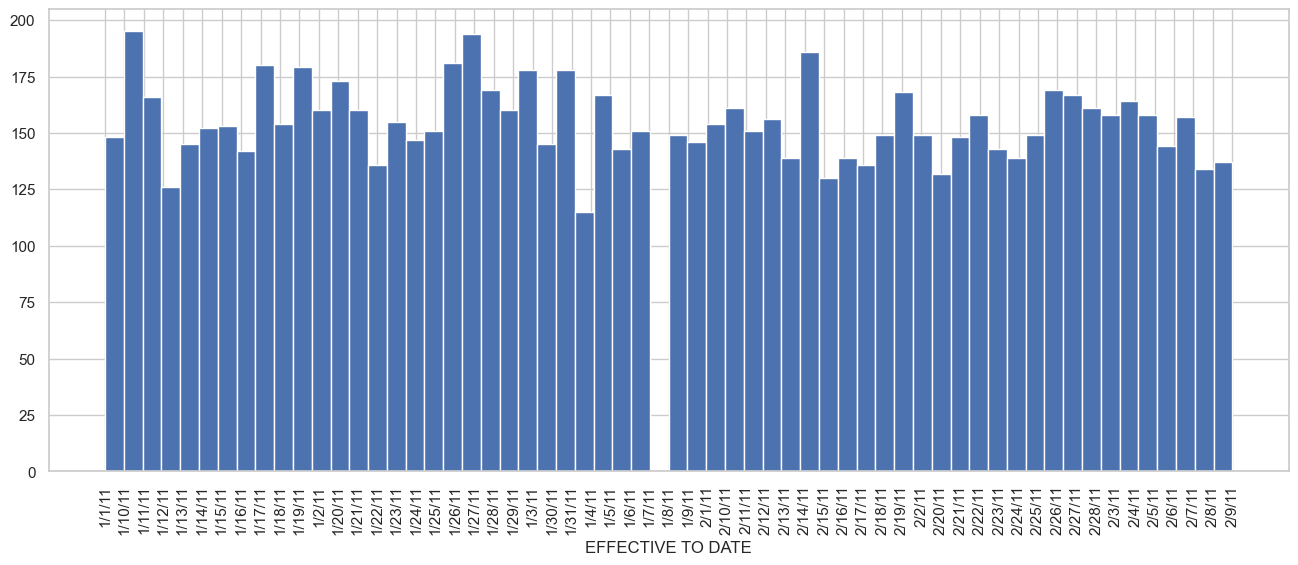

In [154]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de series de tiempo
plt.figure(figsize=(16, 6))  # Ajusta el tamaño del gráfico según tus preferencias

sorted_df = df.sort_values(by=['EFFECTIVE_TO_DATE'])

sorted_df['EFFECTIVE_TO_DATE'].hist(bins=60)

# Añade título y etiquetas a los ejes
plt.xlabel('EFFECTIVE TO DATE')

# Rotación de las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()